# DACON 14

### 신용카드 사용자 연체 예측

### https://www.dacon.io/competitions/official/235713/overview/description

In [1]:
import pandas as pd
import os
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

gender: 성별

car: 차량 소유 여부

reality: 부동산 소유 여부

child_num: 자녀 수

income_total: 연간 소득

income_type: 소득 분류 ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

edu_type: 교육 수준 ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

family_type: 결혼 여부 ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

house_type: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

DAYS_BIRTH: 출생일 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

DAYS_EMPLOYED: 업무 시작일 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미. 양수 값은 고용되지 않은 상태를 의미함

FLAG_MOBIL: 핸드폰 소유 여부

work_phone: 업무용 전화 소유 여부

phone: 전화 소유 여부

email: 이메일 소유 여부

occyp_type: 직업 유형													

family_size: 가족 규모

begin_month: 신용카드 발급 월 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [3]:
label = data['credit']

In [4]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
data.dtypes

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit           float64
dtype: object

In [6]:
data['credit'] = data['credit'].astype(int)

In [7]:
data.dtypes

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit             int32
dtype: object

In [8]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [9]:
data.describe()
#flag_mobil 변수는 모두 1 -> 불필요한 변수로 보임

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [10]:
data['occyp_type'].describe()

count        18286
unique          18
top       Laborers
freq          4512
Name: occyp_type, dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [12]:
pd.isna(data).sum()
#occyp_type 없는건 직업이 없다는건가?.. 데이터 1/3수준이 결측치인 컬럼을 채우는게 의미가 있을지... 둘다 해보긴 해야 할듯
#DAYS_EMPLOYED 양수가 무직을 의미하므로 일치하는지 확인 필요

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [13]:
(data['credit'] == 0).sum(), (data['credit'] == 1).sum(), (data['credit'] == 2).sum()
# 신용등급이라는 특성상 높을 수록 적음, 불균형으로 보임

(3222, 6267, 16968)

In [14]:
data['credit'] = data['credit'].astype(str)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [16]:
#label = data['credit']

In [17]:
pd.isna(data[data['DAYS_EMPLOYED']>0]).sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       4438
family_size         0
begin_month         0
credit              0
dtype: int64

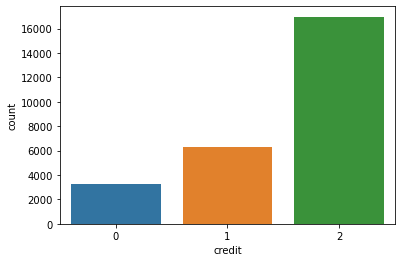

In [18]:
sns.countplot(data['credit'])

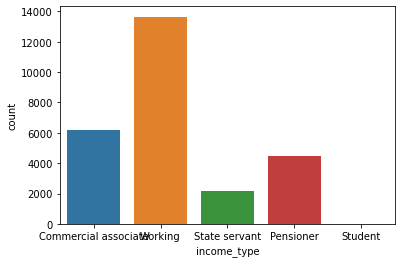

In [19]:
sns.countplot(data['income_type'])

In [20]:
print(data['income_type'].value_counts())

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64


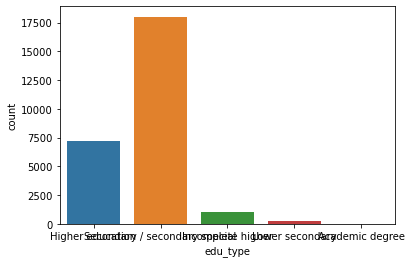

In [21]:
sns.countplot(data['edu_type'])

In [22]:
print(data['edu_type'].value_counts())

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64


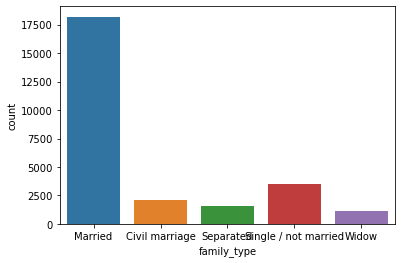

In [23]:
sns.countplot(data['family_type'])

In [24]:
print(data['family_type'].value_counts())

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64


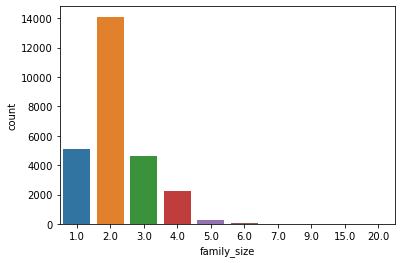

In [25]:
sns.countplot(data['family_size'])

In [26]:
print(data['family_size'].value_counts()),
print(data['family_size'].value_counts() / data['family_size'].count())

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64
2.0     0.533167
1.0     0.193106
3.0     0.175077
4.0     0.085422
5.0     0.010999
6.0     0.001663
7.0     0.000340
15.0    0.000113
9.0     0.000076
20.0    0.000038
Name: family_size, dtype: float64


In [27]:
#data.drop(columns=['credit'], inplace=True)

In [28]:
data.fillna('NaN',inplace=True)

In [29]:
data = data[(data['family_size'] <= 6)]
data = data.reset_index(drop=True)

In [30]:
data.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

In [31]:
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

In [32]:
feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    data[feat]=np.abs(data[feat])

In [33]:
data.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
count,26442.000000,2.644200e+04,26442.000000,26442.000000,26442.000000,26442.000000,26442.000000,26442.000000,26442.000000
mean,0.424363,1.873107e+05,15959.440587,2198.339573,0.224756,0.294305,0.091332,2.192572,26.123289
std,0.717269,1.019041e+05,4202.019615,2370.736626,0.417429,0.455738,0.288086,0.893806,16.559262
min,0.000000,2.700000e+04,7705.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,12446.500000,405.250000,0.000000,0.000000,0.000000,2.000000,12.000000
50%,0.000000,1.575000e+05,15552.000000,1539.000000,0.000000,0.000000,0.000000,2.000000,24.000000
75%,1.000000,2.250000e+05,19431.000000,3153.000000,0.000000,1.000000,0.000000,3.000000,39.000000
max,5.000000,1.575000e+06,25152.000000,15713.000000,1.000000,1.000000,1.000000,6.000000,60.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26442 entries, 0 to 26441
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26442 non-null  object 
 1   car            26442 non-null  object 
 2   reality        26442 non-null  object 
 3   child_num      26442 non-null  int64  
 4   income_total   26442 non-null  float64
 5   income_type    26442 non-null  object 
 6   edu_type       26442 non-null  object 
 7   family_type    26442 non-null  object 
 8   house_type     26442 non-null  object 
 9   DAYS_BIRTH     26442 non-null  int64  
 10  DAYS_EMPLOYED  26442 non-null  int64  
 11  work_phone     26442 non-null  int64  
 12  phone          26442 non-null  int64  
 13  email          26442 non-null  int64  
 14  occyp_type     26442 non-null  object 
 15  family_size    26442 non-null  float64
 16  begin_month    26442 non-null  float64
 17  credit         26442 non-null  object 
dtypes: flo

In [35]:
#파생변수
#스케일링

In [36]:
cat_columns = [c for (c, t) in zip(data.dtypes.index, data.dtypes) if t == 'O'] 
num_columns = [c for c in data.columns if c not in cat_columns]
print(cat_columns, num_columns)

['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'credit'] ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']


In [37]:
cat_columns.remove('credit')
print(cat_columns, num_columns)

['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type'] ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']


In [38]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [39]:
ohe = OneHotEncoder(sparse=False)
#data[cat_columns] = encoder.fit_transform(data[cat_columns], data['credit'])

In [40]:
ohe.fit_transform(data[cat_columns], data['credit'])

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [41]:
data[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26442 entries, 0 to 26441
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       26442 non-null  object
 1   car          26442 non-null  object
 2   reality      26442 non-null  object
 3   income_type  26442 non-null  object
 4   edu_type     26442 non-null  object
 5   family_type  26442 non-null  object
 6   house_type   26442 non-null  object
 7   occyp_type   26442 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [42]:
for i in cat_columns:
    print(i, set(data[i]))

gender {'M', 'F'}
car {'Y', 'N'}
reality {'Y', 'N'}
income_type {'Working', 'Pensioner', 'Student', 'State servant', 'Commercial associate'}
edu_type {'Higher education', 'Academic degree', 'Lower secondary', 'Secondary / secondary special', 'Incomplete higher'}
family_type {'Single / not married', 'Civil marriage', 'Married', 'Widow', 'Separated'}
house_type {'House / apartment', 'Municipal apartment', 'Co-op apartment', 'Rented apartment', 'With parents', 'Office apartment'}
occyp_type {'Accountants', 'Medicine staff', 'HR staff', 'Realty agents', 'Sales staff', 'Secretaries', 'Waiters/barmen staff', 'Cooking staff', 'Low-skill Laborers', 'Private service staff', 'Cleaning staff', 'IT staff', 'Core staff', 'NaN', 'Managers', 'Security staff', 'Laborers', 'High skill tech staff', 'Drivers'}


In [43]:
ohe_columns = []
for i in range(len(cat_columns)):
      ohe_columns += ohe.categories_[i].tolist()
print(ohe_columns)

['F', 'M', 'N', 'Y', 'N', 'Y', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working', 'Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special', 'Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow', 'Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents', 'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff', 'NaN', 'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff']


In [44]:
new_data = ohe.fit_transform(data[cat_columns], data['credit'])

In [45]:
new_data = pd.DataFrame(new_data, columns=ohe_columns)

In [46]:
new_data.head()

,F,M,N,Y,N,Y,Commercial associate,Pensioner,State servant,Student,...,Low-skill Laborers,Managers,Medicine staff,NaN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
new_data = new_data.reset_index(drop=True) 

In [48]:
new_data.head()

,F,M,N,Y,N,Y,Commercial associate,Pensioner,State servant,Student,...,Low-skill Laborers,Managers,Medicine staff,NaN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
new_data.columns.values[2] = 'car_N'
new_data.columns.values[3] = 'car_Y'
new_data.columns.values[4] = 'reality_N'
new_data.columns.values[5] = 'reality_Y'

In [50]:
new_data.head()

,F,M,car_N,car_Y,reality_N,reality_Y,Commercial associate,Pensioner,State servant,Student,...,Low-skill Laborers,Managers,Medicine staff,NaN,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data[num_columns]

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,0,202500.0,13899,4709,0,0,0,2.0,6.0
1,1,247500.0,11380,1540,0,0,1,3.0,5.0
2,0,450000.0,19087,4434,0,1,0,2.0,22.0
3,0,202500.0,15088,2092,0,1,0,2.0,37.0
4,0,157500.0,15037,2105,0,0,0,2.0,26.0
...,...,...,...,...,...,...,...,...,...
26437,2,225000.0,12079,1984,0,0,0,4.0,2.0
26438,1,180000.0,15291,2475,0,0,0,2.0,47.0
26439,0,292500.0,10082,2015,0,0,0,2.0,25.0
26440,0,171000.0,10145,107,0,0,0,1.0,59.0


In [52]:
new_data_mean = np.mean(data[num_columns], axis=0)
new_data_std  = np.std(data[num_columns], axis=0)

new_num_data = (data[num_columns] - new_data_mean) / (new_data_std + 1e-4) #너무 작은 값의 경우 NaN 처리 되는경우가 있음

In [53]:
new_num_data.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,-0.591566,0.149058,-0.490355,1.059041,-0.53831,-0.645646,-0.316926,-0.215432,-1.215244
1,0.802444,0.590658,-1.089840,-0.277699,-0.53831,-0.645646,3.153120,0.903275,-1.275634
2,-0.591566,2.577858,0.744313,0.943041,-0.53831,1.548157,-0.316926,-0.215432,-0.249005
3,-0.591566,0.149058,-0.207390,-0.044856,-0.53831,1.548157,-0.316926,-0.215432,0.656844
4,-0.591566,-0.292542,-0.219527,-0.039372,-0.53831,-0.645646,-0.316926,-0.215432,-0.007445


In [54]:
new_data = new_data.reset_index(drop=True)

In [55]:
new_num_data = new_num_data.reset_index(drop=True)

In [56]:
result = pd.concat([new_data,new_num_data], axis=1)
result.head()

,F,M,car_N,car_Y,reality_N,reality_Y,Commercial associate,Pensioner,State servant,Student,...,Waiters/barmen staff,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.591566,0.149058,-0.490355,1.059041,-0.53831,-0.645646,-0.316926,-0.215432,-1.215244
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.802444,0.590658,-1.089840,-0.277699,-0.53831,-0.645646,3.153120,0.903275,-1.275634
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.591566,2.577858,0.744313,0.943041,-0.53831,1.548157,-0.316926,-0.215432,-0.249005
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,-0.591566,0.149058,-0.207390,-0.044856,-0.53831,1.548157,-0.316926,-0.215432,0.656844
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,-0.591566,-0.292542,-0.219527,-0.039372,-0.53831,-0.645646,-0.316926,-0.215432,-0.007445


In [57]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26442 entries, 0 to 26441
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   F                              26442 non-null  float64
 1   M                              26442 non-null  float64
 2   car_N                          26442 non-null  float64
 3   car_Y                          26442 non-null  float64
 4   reality_N                      26442 non-null  float64
 5   reality_Y                      26442 non-null  float64
 6   Commercial associate           26442 non-null  float64
 7   Pensioner                      26442 non-null  float64
 8   State servant                  26442 non-null  float64
 9   Student                        26442 non-null  float64
 10  Working                        26442 non-null  float64
 11  Academic degree                26442 non-null  float64
 12  Higher education               26442 non-null 

In [58]:
label = data['credit']
label.dtypes

dtype('O')

In [59]:
#data.drop(columns=['credit'], inplace=True)

In [60]:
#print(label.astype('int'))
label2 = label.astype('category')

In [60]:
#모델링

In [61]:
from sklearn.model_selection import StratifiedKFold # KFold일지 StratifiedKFold를 사용해야하는지 고민해보세요.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

In [62]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics  import log_loss

In [63]:
result.shape, label2.shape

((26442, 55), (26442,))

In [64]:
label2.unique()

[1, 2, 0]
Categories (3, object): [1, 2, 0]

In [65]:
for i, (trn_idx, val_idx) in enumerate(skf.split(result, label2)) :
    print(trn_idx, val_idx)

[    0     2     3 ... 26436 26438 26441] [    1     5     9 ... 26437 26439 26440]
[    0     1     2 ... 26439 26440 26441] [    3     6    15 ... 26428 26431 26435]
[    0     1     3 ... 26438 26439 26440] [    2     7    13 ... 26416 26433 26441]
[    1     2     3 ... 26439 26440 26441] [    0     4    14 ... 26434 26436 26438]
[    0     1     2 ... 26439 26440 26441] [    8    11    12 ... 26425 26429 26432]


In [67]:
val_scores = list()

for i, (trn_idx, val_idx) in enumerate(skf.split(result, label)) :
    x_train, y_train = result.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = result.iloc[val_idx, :], label[val_idx]
    
    
    # 모델 정의
    xgb = XGBClassifier(n_estimators=10, max_depth=10, random_state=2020, n_jobs = 6)
    
    # 모델 학습
    xgb.fit(x_train, y_train)

    # 훈련, 검증 데이터 F1 Score 확인
    #print(set(xgb.predict(x_train)))
    #trn_proba = log_loss(y_train, xgb.predict(x_train)) ##, labels=xgb.classes_
    trn_proba = log_loss(y_train, xgb.predict_proba(x_train)) ##, labels=xgb.classes_
    val_proba = log_loss(y_valid, xgb.predict_proba(x_valid))
    print('{} Fold, train log_loss : {:.4f}%, validation log_loss : {:.4f}%'.format(i, trn_proba, val_proba))
    
    val_scores.append(val_proba)

#교차 검증 log_loss 평균 계산하기
print('Cross Validation Score : {:.4f}%'.format(np.mean(val_scores)))

0 Fold, train log_loss : 0.6644%, validation log_loss : 0.7697%
1 Fold, train log_loss : 0.6695%, validation log_loss : 0.7709%
2 Fold, train log_loss : 0.6771%, validation log_loss : 0.7778%
3 Fold, train log_loss : 0.6711%, validation log_loss : 0.7775%
4 Fold, train log_loss : 0.6745%, validation log_loss : 0.7758%
Cross Validation Score : 0.7743%


In [68]:
#######LGB 학습

val_scores2 = list()

for i, (trn_idx, val_idx) in enumerate(skf.split(result, label)) :
    x_train, y_train = result.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = result.iloc[val_idx, :], label[val_idx]

    
    # 모델 정의
    
    lgb = LGBMClassifier(n_estimators=10, max_depth=10, random_state=2020, n_jobs = 6)
    
    # 모델 학습
    lgb.fit(x_train, y_train)

    # 훈련, 검증 데이터 F1 Score 확인
    trn_f1 = log_loss(y_train, lgb.predict_proba(x_train))
    val_f1 = log_loss(y_valid, lgb.predict_proba(x_valid))
    print('{} Fold, train log_loss : {:.4f}%, validation log_loss : {:.4f}%'.format(i, trn_f1, val_f1))
    
    val_scores2.append(val_f1)

#교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}%'.format(np.mean(val_scores2)))

0 Fold, train log_loss : 0.8049%, validation log_loss : 0.8159%
1 Fold, train log_loss : 0.8050%, validation log_loss : 0.8162%
2 Fold, train log_loss : 0.8050%, validation log_loss : 0.8188%
3 Fold, train log_loss : 0.8051%, validation log_loss : 0.8165%
4 Fold, train log_loss : 0.8050%, validation log_loss : 0.8172%
Cross Validation Score : 0.8169%


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
#######RF 학습

val_scores3 = list()

for i, (trn_idx, val_idx) in enumerate(skf.split(result, label)) :
    x_train, y_train = result.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = result.iloc[val_idx, :], label[val_idx]

    
    # 모델 정의
    
    rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=2020, n_jobs = 6)
    
    # 모델 학습
    rf.fit(x_train, y_train)

    # 훈련, 검증 데이터 F1 Score 확인
    trn_f1 = log_loss(y_train, rf.predict_proba(x_train))
    val_f1 = log_loss(y_valid, rf.predict_proba(x_valid))
    print('{} Fold, train log_loss : {:.4f}%, validation log_loss : {:.4f}%'.format(i, trn_f1, val_f1))
    
    val_scores3.append(val_f1)

#교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}%'.format(np.mean(val_scores3)))

0 Fold, train log_loss : 0.7532%, validation log_loss : 0.7969%
1 Fold, train log_loss : 0.7550%, validation log_loss : 0.8008%
2 Fold, train log_loss : 0.7512%, validation log_loss : 0.7973%
3 Fold, train log_loss : 0.7604%, validation log_loss : 0.7992%
4 Fold, train log_loss : 0.7573%, validation log_loss : 0.7995%
Cross Validation Score : 0.7987%


In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
#######Logistic 학습

val_scores4 = list()

for i, (trn_idx, val_idx) in enumerate(skf.split(result, label)) :
    x_train, y_train = result.iloc[trn_idx, :], label[trn_idx]
    x_valid, y_valid = result.iloc[val_idx, :], label[val_idx]

    
    # 모델 정의
    
    lgm = LogisticRegression(random_state=2020, n_jobs = 6)
    
    # 모델 학습
    lgm.fit(x_train, y_train)

    # 훈련, 검증 데이터 F1 Score 확인
    trn_f1 = log_loss(y_train, lgm.predict_proba(x_train))
    val_f1 = log_loss(y_valid, lgm.predict_proba(x_valid))
    print('{} Fold, train log_loss : {:.4f}%, validation log_loss : {:.4f}%'.format(i, trn_f1, val_f1))
    
    val_scores4.append(val_f1)

#교차 검증 F1 Score 평균 계산하기
print('Cross Validation Score : {:.4f}%'.format(np.mean(val_scores4)))

0 Fold, train log_loss : 0.8587%, validation log_loss : 0.8617%
1 Fold, train log_loss : 0.8586%, validation log_loss : 0.8621%
2 Fold, train log_loss : 0.8588%, validation log_loss : 0.8614%
3 Fold, train log_loss : 0.8572%, validation log_loss : 0.8679%
4 Fold, train log_loss : 0.8595%, validation log_loss : 0.8587%
Cross Validation Score : 0.8624%
